In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Daten laden
df = pd.read_csv('creditcard.csv')
# Erster Blick
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Class
0    284315
1       492
Name: count, dtype: int64


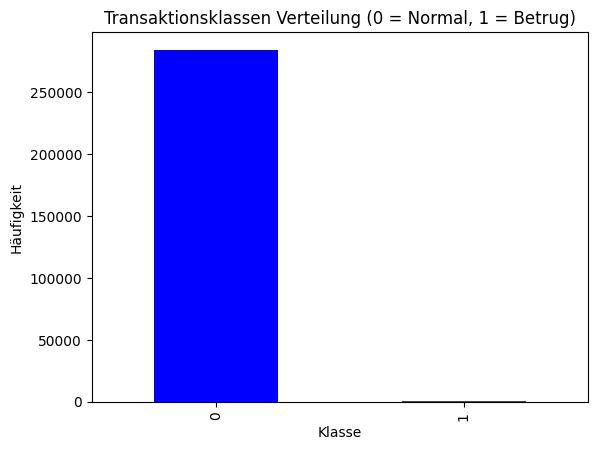

Anteil der Betrugsfälle: 0.17%


In [3]:
count_classes = df['Class'].value_counts()
print(count_classes)

# Visualisierung
count_classes.plot(kind='bar', color=['blue', 'red'])
plt.title("Transaktionsklassen Verteilung (0 = Normal, 1 = Betrug)")
plt.xlabel("Klasse")
plt.ylabel("Häufigkeit")
plt.show()

# Prozentualer Anteil
fraud_share = len(df[df['Class'] == 1]) / len(df)
print(f"Anteil der Betrugsfälle: {fraud_share:.2%}")


In [4]:
scaler = StandardScaler()

# 'Amount' skalieren und als neue Spalte speichern
df['Amount_Scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Wir droppen 'Time' (oft irrelevant für einfache Modelle) und das alte 'Amount'
df = df.drop(['Time', 'Amount'], axis=1)

# X und y definieren
X = df.drop('Class', axis=1)
y = df['Class']

# Split in Training und Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Modell initialisieren
# class_weight='balanced' bestraft Fehler bei der Minderheit (Betrug) stärker
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)

print("Starte Training")
model.fit(X_train, y_train)
print("Training beendet!")

Starte Training
Training beendet!


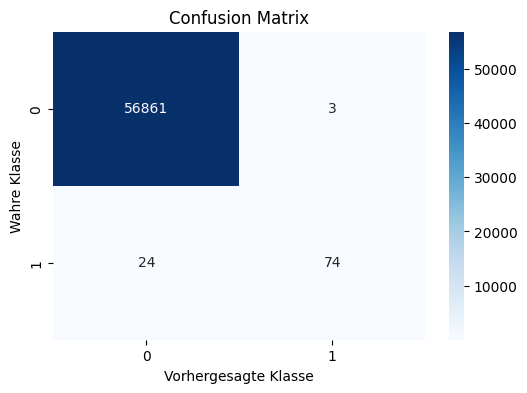

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [6]:
y_pred = model.predict(X_test)

# 1. Confusion Matrix visualisieren
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Wahre Klasse')
plt.xlabel('Vorhergesagte Klasse')
plt.show()

# 2. Genauere Metriken
print(classification_report(y_test, y_pred))